# Feature Engineering for current ADS (ADS V6)

In [1]:
import pandas as pd
import numpy as np
from dateutil.parser import parse
from datetime import datetime
import csv
import matplotlib.pyplot as plt
import math
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
from IPython.display import display_html
warnings.filterwarnings('ignore')
%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
from IPython.display import display
from IPython.display import HTML
import IPython.core.display as di # Example: di.display_html('<h3>%s:</h3>' % str, raw=True)

# This line will hide code by default when the notebook is exported as HTML
di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)

# This line will add a button to toggle visibility of code blocks, for use with the HTML export version
di.display_html('''<button style="color:"black";right:75%;" onclick="jQuery('.input_area').toggle(); jQuery('.prompt').toggle();">Toggle code</button>''', raw=True)

Toggle code

In [2]:
# read ads for gcs
ads_v6 = pd.read_csv(r'gs://aes-datahub-0001-raw/OMS/IPL/ADS_V6.csv', sep = ";", encoding = "ISO-8859-1")
ads_v6.reset_index(drop=True, inplace=True)
ads_v6.head()

,OUTAGE_ID,INCIDENT_ID,STRCTUR_NO,EVENT,CREATION_DATETIME,ENERGIZED_DATETIME,CIRCT_ID,DNI_EQUIP_TYPE,SUBST_ID,CALL_QTY,DOWNSTREAM_CUST_QTY,KEY_CUST_QTY,ETR_DATETIME,CUST_QTY,DOWNSTREAM_KVA_VAL,KVA_VAL,DAY_FLAG,TTR,POLE_CLUE_FLG,PART_LIGHT_CLUE_FLG,EMERGENCY_CLUE_FLG,POWER_OUT_CLUE_FLG,OPEN_DEVICE_CLUE_FLG,TREE_CLUE_FLG,WIRE_DOWN_CLUE_FLG,IVR_CLUE_FLG,EQUIPMENT_CLUE_FLG,TRANSFORMER_CLUE_FLG,OH_CAUSE_FLG,UG_CAUSE_FLG,ANIMAL_CAUSE_FLG,WEATHER_CAUSE_FLG,WEATHER_COLD_CAUSE_FLG,PUBLIC_CAUSE_FLG,WEATHER_LIGHTNING_CAUSE_FLG,WEATHER__SNOW_CAUSE_FLG,WEATHER__WIND_CAUSE_FLG,WEATHER__HEAT_CAUSE_FLG,CUST_REQUEST_CAUSE_FLG,WEATHER__FLOOD_CAUSE_FLG,STREET_CAUSE_FLG,SUBSTATION_CAUSE_FLG,TREE_CAUSE_FLG,MISCELLANEOUS_CAUSE_FLG,NO_CAUSE_FLG,PLANNED_CAUSE_FLG,NO_OUTAGE_CAUSE_FLG,FUSE_OCCURN_FLG,CUST_EQUIP_OCCURN_FLG,POLE_OCCURN_FLG,TRANSFORMER_OCCURN_FLG,METER_OCCURN_FLG,SERVICE_OCCURN_FLG,CABLE_OCCURN_FLG,ST_OCCURN_FLG,FIRE_OCCURN_FLG,FOUND_OPEN_OCCURN_FLG,PUBLIC_SAFETY_OCCURN_FLG,WIRE_OCCURN_FLG,SWITCH_OCCURN_FLG,REGULATOR_OCCURN_FLG,CUTOUT_OCCURN_FLG,CAP_BANK_OCCURN_FLG,RECLOSER_OCCURN_FLG,OH_OCCURN_FLG,PRIORITY_VAL_1.0,PRIORITY_VAL_2.0,PRIORITY_VAL_3.0,PRIORITY_VAL_5.0,CITY_NAM,LAT,LONG
0,2001309371,2.000384e+09,3059,BLUE SKY,2007-01-01 03:33:00,2007-01-01 03:48:00,3059.0,SSUB,305.0,4,177.0,1.0,2007-01-01 05:03:00,177.0,592.333333,592.333333,0,15.0000,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,INDIANAPOLIS,39.880768,-86.113058
1,2001309379,2.000384e+09,494-B/403,BLUE SKY,2007-01-01 08:16:14,2007-01-01 10:04:24,1252.0,FUSE,125.0,1,5.0,0.0,2007-01-01 11:46:14,5.0,433.300000,433.300000,1,108.1667,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,INDIANAPOLIS,39.776967,-86.265049
2,2001309376,2.000384e+09,404-A/85,BLUE SKY,2007-01-01 09:36:18,2007-01-01 10:15:54,1958.0,1TBOH,195.0,2,6.0,0.0,2007-01-01 13:06:18,6.0,25.000000,25.000000,1,39.6000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,INDIANAPOLIS,39.828987,-86.168859
3,2001309377,2.000384e+09,675--/125,OTHER,2007-01-01 09:38:00,2007-01-01 10:15:00,1701.0,3TBOH,170.0,1,1.0,0.0,2007-01-01 13:08:21,1.0,37.000000,37.000000,1,37.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,INDIANAPOLIS,39.707736,-86.066659
4,2001309382,2.000384e+09,465-A/25,OTHER,2007-01-01 10:38:10,2007-01-01 11:11:04,1960.0,1TBOH,195.0,1,8.0,0.0,2007-01-01 14:08:10,8.0,25.000000,25.000000,1,32.9000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,INDIANAPOLIS,39.802140,-86.167293


### Correlation Plot for ADS

In [3]:
# remove variables which are flag as they are categorical variables 
ads = ads_v6[ads_v6.columns[~pd.Series(ads_v6.columns).str.contains("FLG")]]
ads = ads[ads.columns[~pd.Series(ads.columns).str.contains("PRIORITY")]]

In [4]:
print(list(ads.columns))

['OUTAGE_ID', 'INCIDENT_ID', 'STRCTUR_NO', 'EVENT', 'CREATION_DATETIME', 'ENERGIZED_DATETIME', 'CIRCT_ID', 'DNI_EQUIP_TYPE', 'SUBST_ID', 'CALL_QTY', 'DOWNSTREAM_CUST_QTY', 'KEY_CUST_QTY', 'ETR_DATETIME', 'CUST_QTY', 'DOWNSTREAM_KVA_VAL', 'KVA_VAL', 'DAY_FLAG', 'TTR', 'CITY_NAM', 'LAT', 'LONG']


In [ ]:
# Plot
plt.figure(figsize=(30,30), dpi= 80)
sns.heatmap(ads.corr(), xticklabels=ads.corr().columns, yticklabels=ads.corr().columns, cmap='RdYlGn', center=0, annot=True)

# Decorations
plt.title('Correlation Matrix', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

import matplotlib.image as mpimg

img = mpimg.imread("src.png")
mpimg.imsave("out.png", img)

### Outlier Analysis

In [25]:
# remove variables which are flag as they are categorical variables 
ads = ads_v6[ads_v6.columns[~pd.Series(ads_v6.columns).str.contains("FLG")]]

In [33]:
ads.dtypes

OUTAGE_ID                int64
INCIDENT_ID            float64
STRCTUR_NO              object
EVENT                   object
CREATION_DATETIME       object
ENERGIZED_DATETIME      object
CIRCT_ID               float64
DNI_EQUIP_TYPE          object
SUBST_ID               float64
CALL_QTY                 int64
DOWNSTREAM_CUST_QTY    float64
KEY_CUST_QTY           float64
ETR_DATETIME            object
CUST_QTY               float64
DOWNSTREAM_KVA_VAL     float64
KVA_VAL                float64
DAY_FLAG                 int64
TTR                    float64
PRIORITY_VAL_1.0         int64
PRIORITY_VAL_2.0         int64
PRIORITY_VAL_3.0         int64
PRIORITY_VAL_5.0         int64
CITY_NAM                object
LAT                    float64
LONG                   float64
dtype: object

In [26]:
Q1 = ads.quantile(0.25)
Q3 = ads.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

OUTAGE_ID              715600.500000
INCIDENT_ID            587024.500000
CIRCT_ID                 1399.000000
SUBST_ID                  130.000000
CALL_QTY                    6.000000
DOWNSTREAM_CUST_QTY        17.000000
KEY_CUST_QTY                0.000000
CUST_QTY                   17.000000
DOWNSTREAM_KVA_VAL        141.700000
KVA_VAL                   125.000000
DAY_FLAG                    1.000000
TTR                       145.950000
PRIORITY_VAL_1.0            0.000000
PRIORITY_VAL_2.0            0.000000
PRIORITY_VAL_3.0            0.000000
PRIORITY_VAL_5.0            0.000000
LAT                         0.116576
LONG                        0.143964
dtype: float64


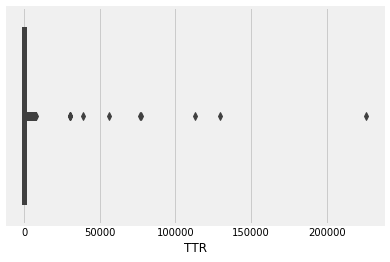

In [27]:
import seaborn as sns
sns.boxplot(x=ads['TTR'])

In [30]:
# fuction to remove outliers from the dataframe
from pandas.api.types import is_numeric_dtype
def remove_outlier(df):
    low = .05
    high = .95
    quant_df = df.quantile([low, high])
    print(quant_df)
    for name in list(df.columns):
        if is_numeric_dtype(df[name]):
            df = df[(df[name] > quant_df.loc[low, name]) & (df[name] < quant_df.loc[high, name])]
    return df

In [32]:
remove_outlier(ads).head()

         OUTAGE_ID   INCIDENT_ID  CIRCT_ID  SUBST_ID  CALL_QTY  DOWNSTREAM_CUST_QTY  KEY_CUST_QTY  CUST_QTY  DOWNSTREAM_KVA_VAL     KVA_VAL  DAY_FLAG       TTR  PRIORITY_VAL_1.0  PRIORITY_VAL_2.0  PRIORITY_VAL_3.0  PRIORITY_VAL_5.0        LAT       LONG
0.05  2.001348e+09  2.000417e+09    1253.0     110.0       1.0                  1.0           0.0       1.0                 0.0    0.000000       0.0    14.950               0.0               0.0               0.0               0.0  39.643590 -86.321502
0.95  2.002558e+09  2.001395e+09    7054.0     700.0      43.0                161.9           2.0     161.9               983.3  860.603333       1.0  1222.985               0.0               1.0               0.0               0.0  39.917215 -85.987781


,OUTAGE_ID,INCIDENT_ID,STRCTUR_NO,EVENT,CREATION_DATETIME,ENERGIZED_DATETIME,CIRCT_ID,DNI_EQUIP_TYPE,SUBST_ID,CALL_QTY,DOWNSTREAM_CUST_QTY,KEY_CUST_QTY,ETR_DATETIME,CUST_QTY,DOWNSTREAM_KVA_VAL,KVA_VAL,DAY_FLAG,TTR,PRIORITY_VAL_1.0,PRIORITY_VAL_2.0,PRIORITY_VAL_3.0,PRIORITY_VAL_5.0,CITY_NAM,LAT,LONG


# Check if CREATION_DATETIME, ENERGIZED_DATETIME is similar to D11_START_DATETIME and D11_END_DATETIME

In [15]:
ads_v6 = pd.read_csv(r'gs://aes-datahub-0001-raw/OMS/IPL/ADS_V6.csv', sep = ";", encoding = "ISO-8859-1")
ads_v6.reset_index(drop=True, inplace=True)
ads_v6.head()

,OUTAGE_ID,INCIDENT_ID,STRCTUR_NO,EVENT,CREATION_DATETIME,ENERGIZED_DATETIME,CIRCT_ID,DNI_EQUIP_TYPE,SUBST_ID,CALL_QTY,DOWNSTREAM_CUST_QTY,KEY_CUST_QTY,ETR_DATETIME,CUST_QTY,DOWNSTREAM_KVA_VAL,KVA_VAL,DAY_FLAG,TTR,POLE_CLUE_FLG,PART_LIGHT_CLUE_FLG,EMERGENCY_CLUE_FLG,POWER_OUT_CLUE_FLG,OPEN_DEVICE_CLUE_FLG,TREE_CLUE_FLG,WIRE_DOWN_CLUE_FLG,IVR_CLUE_FLG,EQUIPMENT_CLUE_FLG,TRANSFORMER_CLUE_FLG,OH_CAUSE_FLG,UG_CAUSE_FLG,ANIMAL_CAUSE_FLG,WEATHER_CAUSE_FLG,WEATHER_COLD_CAUSE_FLG,PUBLIC_CAUSE_FLG,WEATHER_LIGHTNING_CAUSE_FLG,WEATHER__SNOW_CAUSE_FLG,WEATHER__WIND_CAUSE_FLG,WEATHER__HEAT_CAUSE_FLG,CUST_REQUEST_CAUSE_FLG,WEATHER__FLOOD_CAUSE_FLG,STREET_CAUSE_FLG,SUBSTATION_CAUSE_FLG,TREE_CAUSE_FLG,MISCELLANEOUS_CAUSE_FLG,NO_CAUSE_FLG,PLANNED_CAUSE_FLG,NO_OUTAGE_CAUSE_FLG,FUSE_OCCURN_FLG,CUST_EQUIP_OCCURN_FLG,POLE_OCCURN_FLG,TRANSFORMER_OCCURN_FLG,METER_OCCURN_FLG,SERVICE_OCCURN_FLG,CABLE_OCCURN_FLG,ST_OCCURN_FLG,FIRE_OCCURN_FLG,FOUND_OPEN_OCCURN_FLG,PUBLIC_SAFETY_OCCURN_FLG,WIRE_OCCURN_FLG,SWITCH_OCCURN_FLG,REGULATOR_OCCURN_FLG,CUTOUT_OCCURN_FLG,CAP_BANK_OCCURN_FLG,RECLOSER_OCCURN_FLG,OH_OCCURN_FLG,PRIORITY_VAL_1.0,PRIORITY_VAL_2.0,PRIORITY_VAL_3.0,PRIORITY_VAL_5.0,CITY_NAM,LAT,LONG
0,2001309371,2.000384e+09,3059,BLUE SKY,2007-01-01 03:33:00,2007-01-01 03:48:00,3059.0,SSUB,305.0,4,177.0,1.0,2007-01-01 05:03:00,177.0,592.333333,592.333333,0,15.0000,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,INDIANAPOLIS,39.880768,-86.113058
1,2001309379,2.000384e+09,494-B/403,BLUE SKY,2007-01-01 08:16:14,2007-01-01 10:04:24,1252.0,FUSE,125.0,1,5.0,0.0,2007-01-01 11:46:14,5.0,433.300000,433.300000,1,108.1667,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,INDIANAPOLIS,39.776967,-86.265049
2,2001309376,2.000384e+09,404-A/85,BLUE SKY,2007-01-01 09:36:18,2007-01-01 10:15:54,1958.0,1TBOH,195.0,2,6.0,0.0,2007-01-01 13:06:18,6.0,25.000000,25.000000,1,39.6000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,INDIANAPOLIS,39.828987,-86.168859
3,2001309377,2.000384e+09,675--/125,OTHER,2007-01-01 09:38:00,2007-01-01 10:15:00,1701.0,3TBOH,170.0,1,1.0,0.0,2007-01-01 13:08:21,1.0,37.000000,37.000000,1,37.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,INDIANAPOLIS,39.707736,-86.066659
4,2001309382,2.000384e+09,465-A/25,OTHER,2007-01-01 10:38:10,2007-01-01 11:11:04,1960.0,1TBOH,195.0,1,8.0,0.0,2007-01-01 14:08:10,8.0,25.000000,25.000000,1,32.9000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,INDIANAPOLIS,39.802140,-86.167293


In [16]:
ads_v6['CREATION_DATETIME'] = pd.to_datetime(ads_v6['CREATION_DATETIME'],errors='coerce')
ads_v6['Year'] = ads_v6['CREATION_DATETIME'].dt.year
ads_v6['Month'] = ads_v6['CREATION_DATETIME'].dt.month

In [7]:
D11_UNIT_ACTIVITY = pd.read_csv(r'gs://aes-datahub-0001-landing/CAD/IPL/CAD.D11_UNIT_ACTIVITY.csv', sep = ";", encoding = "ISO-8859-1")
D11_UNIT_ACTIVITY.reset_index(drop=True, inplace=True)
D11_UNIT_ACTIVITY.head()

,AGENCY_CODE,UNIT,D11_START_DATETIME,B07_STATUS_CODE,ISR_NO,D11_END_DATETIME,D11_CAD_ACTION,S02_SHIFT_CODE,SHIFT_DATE,SERVICE_CODE,D11_CURRENT_LOC,C03S_ORIGIN,LONGITUDE,LATITUDE
0,DIST.OPS,TK509,2011-01-11T19:38:25,ER,IPL-011111-000079,2011-01-11T20:02:22,STATUS,24/7,20060513,00VA,** 11055 E 21ST ST 2100N/E,MOBSTATUS,NaN,NaN
1,DIST.OPS,TK384,2011-01-11T19:43:29,AC,IPL-011111-000080,2011-01-11T19:43:30,STATUS,24/7,20060513,12PR,NaN,MOBSTATUS,NaN,NaN
2,DIST.OPS,TK384,2011-01-11T19:43:30,ER,IPL-011111-000080,2011-01-11T20:25:40,STATUS,24/7,20060513,12PR,** 1703 LONG ACRE TER,MOBSTATUS,NaN,NaN
3,DIST.OPS,TK101,2011-01-11T20:13:19,ER,IPL-011111-000081,2011-01-11T20:27:39,STATUS,24/7,20060513,12PR,** 3925 N BOLTON AVE 5850E/N,MOBSTATUS,NaN,NaN
4,DIST.OPS,TK101,2011-01-11T20:27:43,AC,IPL-011111-000082,2011-01-11T20:27:44,STATUS,24/7,20060513,00VA,NaN,MOBSTATUS,NaN,NaN


In [8]:
D11_UNIT_ACTIVITY['D11_START_DATETIME'] = pd.to_datetime(D11_UNIT_ACTIVITY['D11_START_DATETIME'],errors='coerce')
D11_UNIT_ACTIVITY['Year'] = D11_UNIT_ACTIVITY['D11_START_DATETIME'].dt.year
D11_UNIT_ACTIVITY['Month'] = D11_UNIT_ACTIVITY['D11_START_DATETIME'].dt.month

In [9]:
D11_UNIT = D11_UNIT_ACTIVITY[(D11_UNIT_ACTIVITY.Year==2019) & (D11_UNIT_ACTIVITY.Month==1)]
ads = ads_v6[(ads_v6.Year==2019) & (ads_v6.Month==1)]

AttributeError: 'DataFrame' object has no attribute 'Year'

In [10]:
def common_member(a, b): 
    a_set = set(a) 
    b_set = set(b) 
    if (a_set & b_set): 
        return len(a_set & b_set)
    else: 
        return "No common elements"

In [11]:
d11_list = list(D11_UNIT_ACTIVITY.D11_START_DATETIME.unique())
ads_list = list(ads_v6.CREATION_DATETIME.unique())
print(D11_UNIT_ACTIVITY.D11_START_DATETIME.nunique())
print(ads_v6.CREATION_DATETIME.nunique())
print(common_member(d11_list,ads_list))

14162591
101522
No common elements


In [13]:
ads_v6.loc[ads_v6['CREATION_DATETIME'] < D11_UNIT_ACTIVITY['D11_START_DATETIME']]

ValueError: Can only compare identically-labeled Series objects

In [22]:
d11_list = list(D11_UNIT_ACTIVITY.D11_END_DATETIME.unique())
ads_list = list(ads_v6.ENERGIZED_DATETIME.unique())
print(D11_UNIT_ACTIVITY.D11_END_DATETIME.nunique())
print(ads_v6.ENERGIZED_DATETIME.nunique())
print(common_member(d11_list,ads_list))

12599933
108693
No common elements
